<a href="https://colab.research.google.com/github/adarshakumar395/RRT-Algorithm/blob/main/RRT_with_UI_and_Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required Libraries

In [2]:
!pip install numpy matplotlib scipy

In [3]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.8 MB/s eta 0:00:00


Implementation of RRT Algoritm


Path found:
[10. 19. 25.]
[10.25367479 19.41748987 24.89345746]
[10.34504658 19.82693175 24.62141236]
[10.79686991 19.87795547 24.82938414]
[11.21514184 20.01299099 25.06774101]
[11.62216024 20.28653088 24.97021177]
[12.04985556 20.19846067 24.72665407]
[12.53819514 20.26719246 24.8091186 ]
[12.96772483 20.4058059  25.02427101]
[13.35912584 20.6969241  25.13406828]
[13.74730218 21.00921188 25.09169517]
[14.06265275 21.38389035 25.19254186]
[14.51783398 21.49695255 25.36582484]
[14.53618487 21.95114182 25.57409234]
[14.44546187 22.42985257 25.46181875]
[14.62632409 22.7379598  25.81161697]
[15.04511095 22.89078171 26.03803038]
[15.06423481 23.33008683 25.80002766]
[14.93021629 23.81019365 25.8392255 ]
[15.05676122 24.22307689 26.09124497]
[15.01329798 24.59579445 26.42168796]
[15.27859842 24.9241089  26.68969038]
[15.15107636 24.82747519 27.1633992 ]
[15.1620912  25.27383341 27.38843922]
[15.3995833  25.58875048 27.69572531]
[15.74066315 25.94764266 27.62600488]
[15.81653907 26.07001554

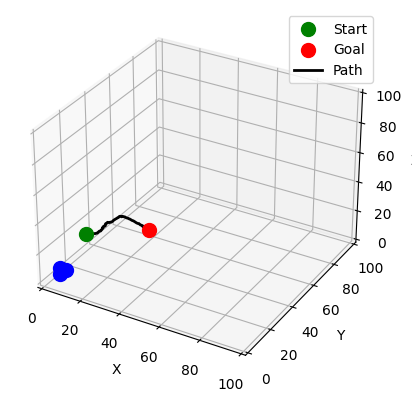

<ipython-input-4-cdab9c853fea>:116: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  drone.set_data(path[0, 0], path[0, 1])
<ipython-input-4-cdab9c853fea>:123: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  drone.set_data(path[num, 0], path[num, 1])


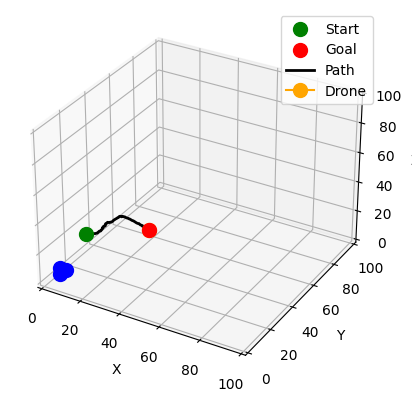

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.spatial import distance
import matplotlib.animation as animation
import ipywidgets as widgets
from IPython.display import display, HTML

# Define the Node class
class Node:
    def __init__(self, position):
        self.position = position
        self.parent = None

# Define the RRT class
class RRT:
    def __init__(self, start, goal, obstacles, bounds, max_iter=10000, step_size=0.5, goal_bias=0.05):
        self.start = Node(start)
        self.goal = Node(goal)
        self.obstacles = obstacles
        self.bounds = bounds
        self.max_iter = max_iter
        self.step_size = step_size
        self.goal_bias = goal_bias
        self.nodes = [self.start]

    def get_random_node(self):
        if random.random() < self.goal_bias:
            return Node(self.goal.position)
        x = random.uniform(self.bounds[0][0], self.bounds[0][1])
        y = random.uniform(self.bounds[1][0], self.bounds[1][1])
        z = random.uniform(self.bounds[2][0], self.bounds[2][1])
        return Node(np.array([x, y, z]))

    def nearest_node(self, random_node):
        distances = [distance.euclidean(node.position, random_node.position) for node in self.nodes]
        nearest_index = distances.index(min(distances))
        return self.nodes[nearest_index]

    def is_collision_free(self, node, new_node):
        for obstacle in self.obstacles:
            if distance.euclidean(obstacle, new_node.position) < self.step_size:
                return False
        return True

    def generate_path(self):
        for i in range(self.max_iter):
            random_node = self.get_random_node()
            nearest_node = self.nearest_node(random_node)
            direction = (random_node.position - nearest_node.position)
            direction = direction / np.linalg.norm(direction) * self.step_size
            new_node_position = nearest_node.position + direction
            new_node = Node(new_node_position)
            if self.is_collision_free(nearest_node, new_node):
                new_node.parent = nearest_node
                self.nodes.append(new_node)
                if distance.euclidean(new_node.position, self.goal.position) < self.step_size:
                    self.goal.parent = new_node
                    self.nodes.append(self.goal)
                    return self.get_path()
        return None

    def get_path(self):
        path = []
        node = self.goal
        while node is not None:
            path.append(node.position)
            node = node.parent
        return path[::-1]

def plot_path(path, obstacles, start, goal):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot start and goal
    ax.scatter(*start, color='green', s=100, label='Start')
    ax.scatter(*goal, color='red', s=100, label='Goal')

    # Plot obstacles
    for obstacle in obstacles:
        ax.scatter(*obstacle, color='blue', s=100)

    # Plot path
    if path:
        path = np.array(path)
        ax.plot(path[:,0], path[:,1], path[:,2], color='black', linewidth=2, label='Path')

    ax.set_xlim(bounds[0])
    ax.set_ylim(bounds[1])
    ax.set_zlim(bounds[2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()

def animate_path(path, obstacles, start, goal):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot start and goal
    ax.scatter(*start, color='green', s=100, label='Start')
    ax.scatter(*goal, color='red', s=100, label='Goal')

    # Plot obstacles
    for obstacle in obstacles:
        ax.scatter(*obstacle, color='blue', s=100)

    # Plot path
    path = np.array(path)
    line, = ax.plot(path[:,0], path[:,1], path[:,2], color='black', linewidth=2, label='Path')

    # Drone marker
    drone, = ax.plot([], [], [], marker='o', markersize=10, color='orange', label='Drone')
    drone.set_data(path[0, 0], path[0, 1])
    drone.set_3d_properties(path[0, 2])

    # Animation function
    def update(num, path, line, drone):
        line.set_data(path[:num, :2].T)
        line.set_3d_properties(path[:num, 2])
        drone.set_data(path[num, 0], path[num, 1])
        drone.set_3d_properties(path[num, 2])
        return line, drone,

    anim = animation.FuncAnimation(fig, update, len(path), fargs=[path, line, drone], interval=100, blit=False)

    ax.set_xlim(bounds[0])
    ax.set_ylim(bounds[1])
    ax.set_zlim(bounds[2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    # Display animation in Colab
    display(HTML(anim.to_html5_video()))

# Interactive UI elements for user input
start_x = widgets.FloatText(value=10.0, description='Start X:')
start_y = widgets.FloatText(value=19.0, description='Start Y:')
start_z = widgets.FloatText(value=25.0, description='Start Z:')
goal_x = widgets.FloatText(value=34.0, description='Goal X:')
goal_y = widgets.FloatText(value=33.0, description='Goal Y:')
goal_z = widgets.FloatText(value=27.0, description='Goal Z:')
obstacles_input = widgets.Text(value='5,5,5; 7,7,7; 3,8,6', description='Obstacles:')
run_button = widgets.Button(description='Run RRT')

ui = widgets.VBox([start_x, start_y, start_z, goal_x, goal_y, goal_z, obstacles_input, run_button])
display(ui)

def run_rrt(b):
    start = np.array([start_x.value, start_y.value, start_z.value])
    goal = np.array([goal_x.value, goal_y.value, goal_z.value])
    obstacles = []
    for obs in obstacles_input.value.split(';'):
        try:
            obstacle = np.array(list(map(float, obs.split(','))))
            if len(obstacle) == 3:
                obstacles.append(obstacle)
        except ValueError:
            print(f"Invalid obstacle entry: {obs}")

    rrt = RRT(start, goal, obstacles, bounds)
    path = rrt.generate_path()

    if path:
        print("Path found:")
        for point in path:
            print(point)
        plot_path(path, obstacles, start, goal)
        animate_path(path, obstacles, start, goal)
    else:
        print("Path not found.")

run_button.on_click(run_rrt)

# Parameters for the RRT
bounds = [(0, 100), (0, 100), (0, 100)]
